# Flows on the circle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

Recall: We go from polar to cartesian coordinates via

$$
    x(t) = r\sin\theta(t) \quad y = r\cos\theta(t)
$$

Meaning

$$
    \dot x(t) = \cos\theta(t)\cdot \dot\theta(t) \quad y =  -\sin\theta(t)\cdot \dot\theta(t)
$$

Consider a really simple dynamics

$$
\dot\theta = 1
$$

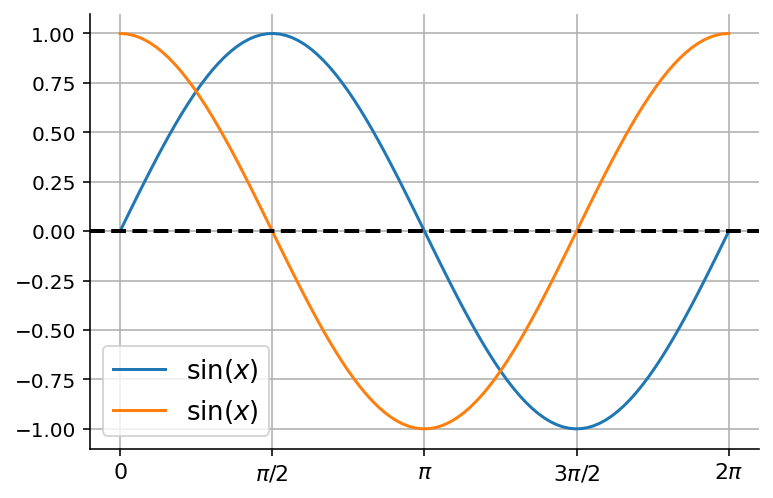

In [3]:
theta_range = np.linspace(0, 2 * np.pi, 100)
xticks = ["0", r"$\pi/2$", r"$\pi$",r"$3\pi/2$",r"$2\pi$",]
xticks_values = np.arange(0, 2 * np.pi + np.pi / 2, np.pi / 2)
plt.plot(theta_range, np.sin(theta_range), label="$\sin(x)$")
plt.plot(theta_range, np.cos(theta_range), label="$\sin(x)$")
plt.xticks(xticks_values, xticks, fontsize=11)
plt.axhline(y=0, c="black", linewidth=2, linestyle="--")
plt.legend(fontsize=13)
plt.grid()

In [4]:
theta_eval = [0, np.pi]

In [5]:
polar_coords = np.concatenate([np.sin(xticks_values)[:, None], np.cos(xticks_values)[:, None]], axis=-1)

In [6]:
theta_circular = np.linspace(0, 2 * np.pi, 100)

In [7]:
def plot_circular_dynamics(theta_inits, f, eps=0.2, rtol=0.02):
    for theta in theta_inits:
        dx, dy = np.cos(theta) * eps, -np.sin(theta) * eps

        dx = np.cos(theta) * eps * f(theta)
        dy = -np.sin(theta) * eps * f(theta)

        if not np.isclose(dx, 0, rtol=rtol) or not np.isclose(dy, 0, rtol=rtol):
            plt.arrow(np.sin(theta) - dx, np.cos(theta) - dy, dx, dy, width=0.035)
        else:
            plt.scatter(np.sin(theta), np.cos(theta), c="black", s=50)

    plt.plot(np.sin(theta_circular), np.cos(theta_circular))
    plt.axis("equal");

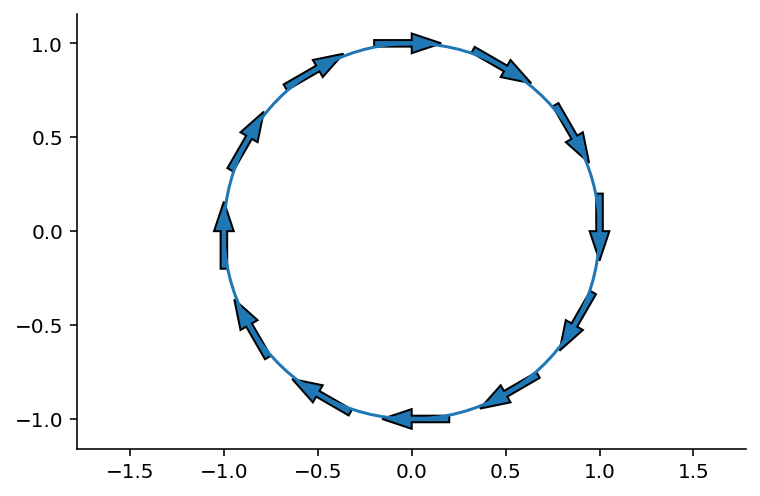

In [8]:
theta_init = np.arange(0, 2 * np.pi, np.pi / 6)

def f(theta):
    return 1

plot_circular_dynamics(theta_init, f)

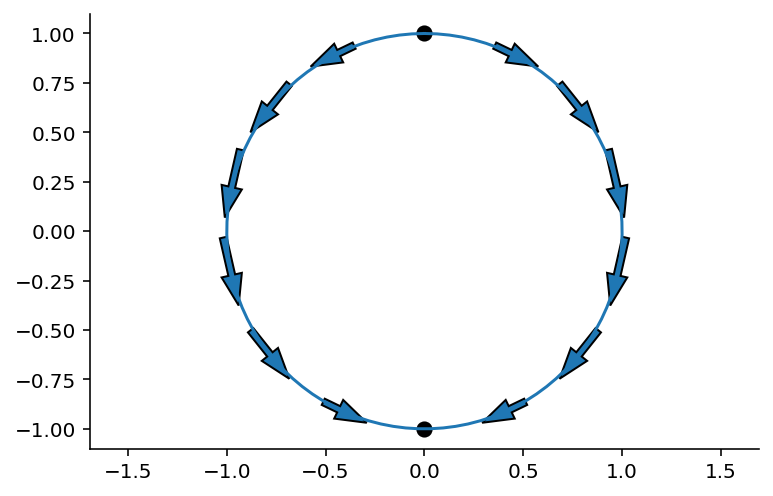

In [9]:
theta_init = np.arange(0, 2 * np.pi, np.pi / 7)

def f(theta):
    return np.sin(theta)

plot_circular_dynamics(theta_init, f)

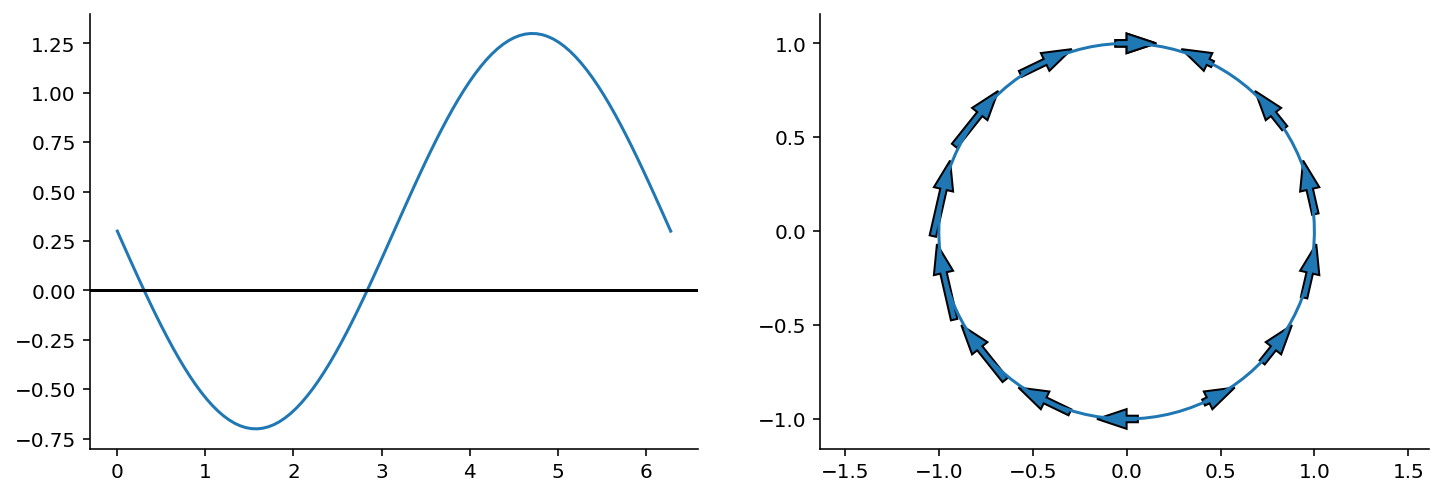

In [10]:
theta_init = np.linspace(0, 2 * np.pi, 15)

omega, a = 0.3, 1
def f(theta):
    return omega - a * np.sin(theta)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(theta_range, f(theta_range))
ax[0].axhline(y=0, c="black")
plot_circular_dynamics(theta_init, f, rtol=0.7)